# Anyone AI

# Project III - Home Credit Default Risk

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import warnings
import time
import lightgbm as lgb
import re

warnings.filterwarnings('ignore')
pd.options.display.max_rows = 180




## Introduction

### Getting the data

------------ 1 ------------

Login to Kaggle (if you don't have an account you'll have to register to get it) and download the [complete dataset](https://www.kaggle.com/competitions/home-credit-default-risk/data). Read the information about the data. What does a row in the main file represent? What does the target variable means?

One row represents one loan in our data sample.
The target variable says wether the loan was repaid (0) or not (1)

------------ 2 ------------

In [ ]:
"""
Load the training and test datasets, we're only going to work withe "application_train.csv" and "application_test.csv" for now

"""

train = pd.read_csv("application_train.csv")
test = pd.read_csv("application_test.csv")

### Exploratory Data Analysis

**Dataset Basics**

------------ 1 ------------

In [ ]:
"""
Show the shape of the training and test datasets.

"""

#Print shape to the dataset
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")

Train: (307511, 122)
Test: (48744, 121)


------------ 2 ------------

In [ ]:
"""
List all columns in the train dataset

"""

# Create var with train columns
Train_Columns = train.columns

# Print var
print(Train_Columns) 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


------------ 3 ------------

In [ ]:
"""
Show the first 5 records of the training dataset, transpose the dataframe to see each record as a column and features as rows,
make sure all features are visualized. 
Take your time to review what kind of information you can gather from this data.

"""

# Print head to the dataset
train.head(5).T

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0,135000.0,121500.0
AMT_CREDIT,406597.5,1293502.5,135000.0,312682.5,513000.0
AMT_ANNUITY,24700.5,35698.5,6750.0,29686.5,21865.5


------------ 4 ------------

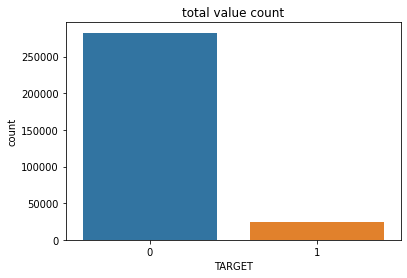

In [ ]:
"""

Show the distribution of the target variable values: print the total value count and the percentage of each value, plot this relationship.

"""

# Create graph
sns.countplot(data=train, x = "TARGET")

# Create tittle
plt.title("total value count")

plt.show()

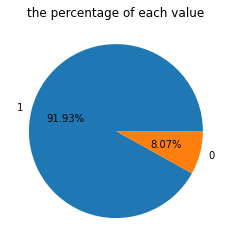

In [ ]:
# Create plot with percentage
plt.pie(train.TARGET.value_counts()/train.TARGET.count(),labels=[1,0],autopct='%1.2f%%')

# Create tittle
plt.title( "the percentage of each value")
plt.show()

------------ 5 ------------

In [ ]:
"""

Show the number of columns of each data type

"""

# Print len the train
print("The number of columns is:",len(train))

# Create vars
Columns_numerical = train.select_dtypes("number").columns
Columns_categorical = train.select_dtypes("object").columns

# Print len the numericals columns
print("\nColumns numericals: ",len(list(Columns_numerical)),list(Columns_numerical))

# Print len the catecoricals columns
print("\nColumns categorical: ",len(list(Columns_categorical)),list(Columns_categorical))


The number of columns is: 307511

Columns numericals:  106 ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',

------------ 6 ------------

In [ ]:
"""
For categorical variables, show the number of distinct values in each column (number of labels)

"""
# Create var with object colums 
Cat_columns = list(train.select_dtypes("object").columns)

# iterate in columns
for i in Cat_columns:

    # Print column with the number of values 
    print(i,len(train[i].value_counts()))

NAME_CONTRACT_TYPE 2
CODE_GENDER 3
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
NAME_TYPE_SUITE 7
NAME_INCOME_TYPE 8
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 6
NAME_HOUSING_TYPE 6
OCCUPATION_TYPE 18
WEEKDAY_APPR_PROCESS_START 7
ORGANIZATION_TYPE 58
FONDKAPREMONT_MODE 4
HOUSETYPE_MODE 3
WALLSMATERIAL_MODE 7
EMERGENCYSTATE_MODE 2


------------ 7 ------------

In [ ]:
"""
Analyzing missing data: 
show the percentage of missing data for each column ordered by percentage descending (show only the 20 columns with higher missing pct)

"""

# sum values null |    get percentage      | Sort values and select 20
train.isna().sum().div(len(train)).mul(100).sort_values(ascending=False).head(20)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
dtype: float64

**Analyzing distribution of variables**

------------ 1 ------------

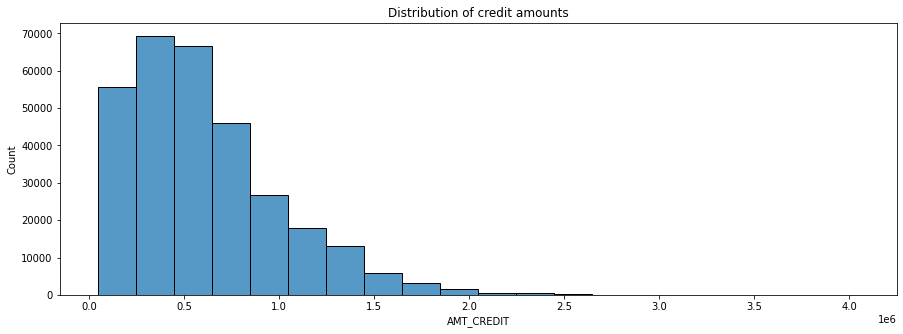

In [ ]:
"""
Show the distribution of credit amounts

"""

# Create plot
sns.histplot(data= train,x="AMT_CREDIT",bins=20)

# Set title
plt.title("Distribution of credit amounts")

# enlarge
plt.figure(1).set_size_inches(15, 5)

plt.show()

------------ 2 ------------

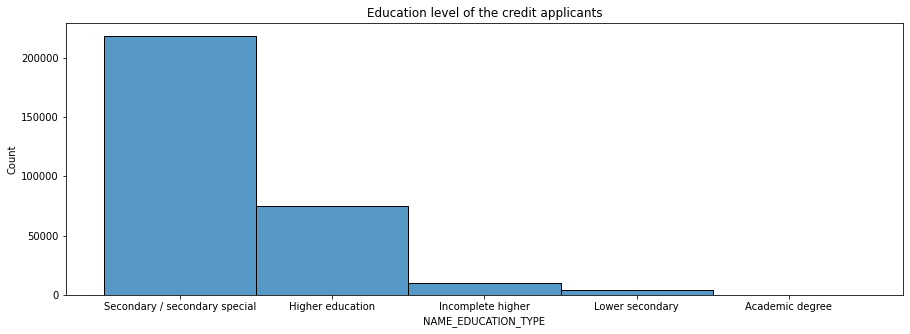

In [ ]:
"""
Plot the education level of the credit applicants, show the percentages of each category. 
Also print the total counts for each category.

"""

# Create plot
sns.histplot(train.NAME_EDUCATION_TYPE)

# 
plt.title("Education level of the credit applicants")

# Enlarge
plt.figure(1).set_size_inches(15, 5)

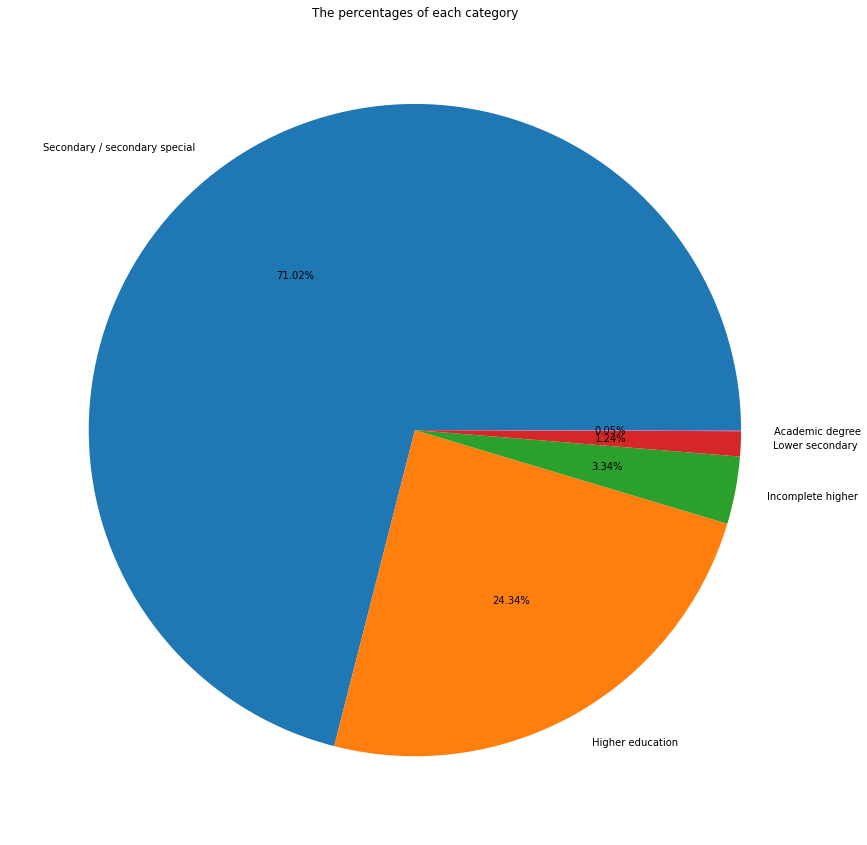

In [ ]:
# Create var with types the category
labels = ['Secondary / secondary special','Higher education','Incomplete higher','Lower secondary','Academic degree']

# Create plot
plt.pie(train.NAME_EDUCATION_TYPE.value_counts()/train.NAME_EDUCATION_TYPE.count(),labels=labels,autopct='%1.2f%%')

# Set title
plt.title("The percentages of each category")

# Enlarge
plt.figure(1).set_size_inches(20, 15)

plt.show()

In [ ]:
# The total counts for each category
train.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

------------ 3 ------------

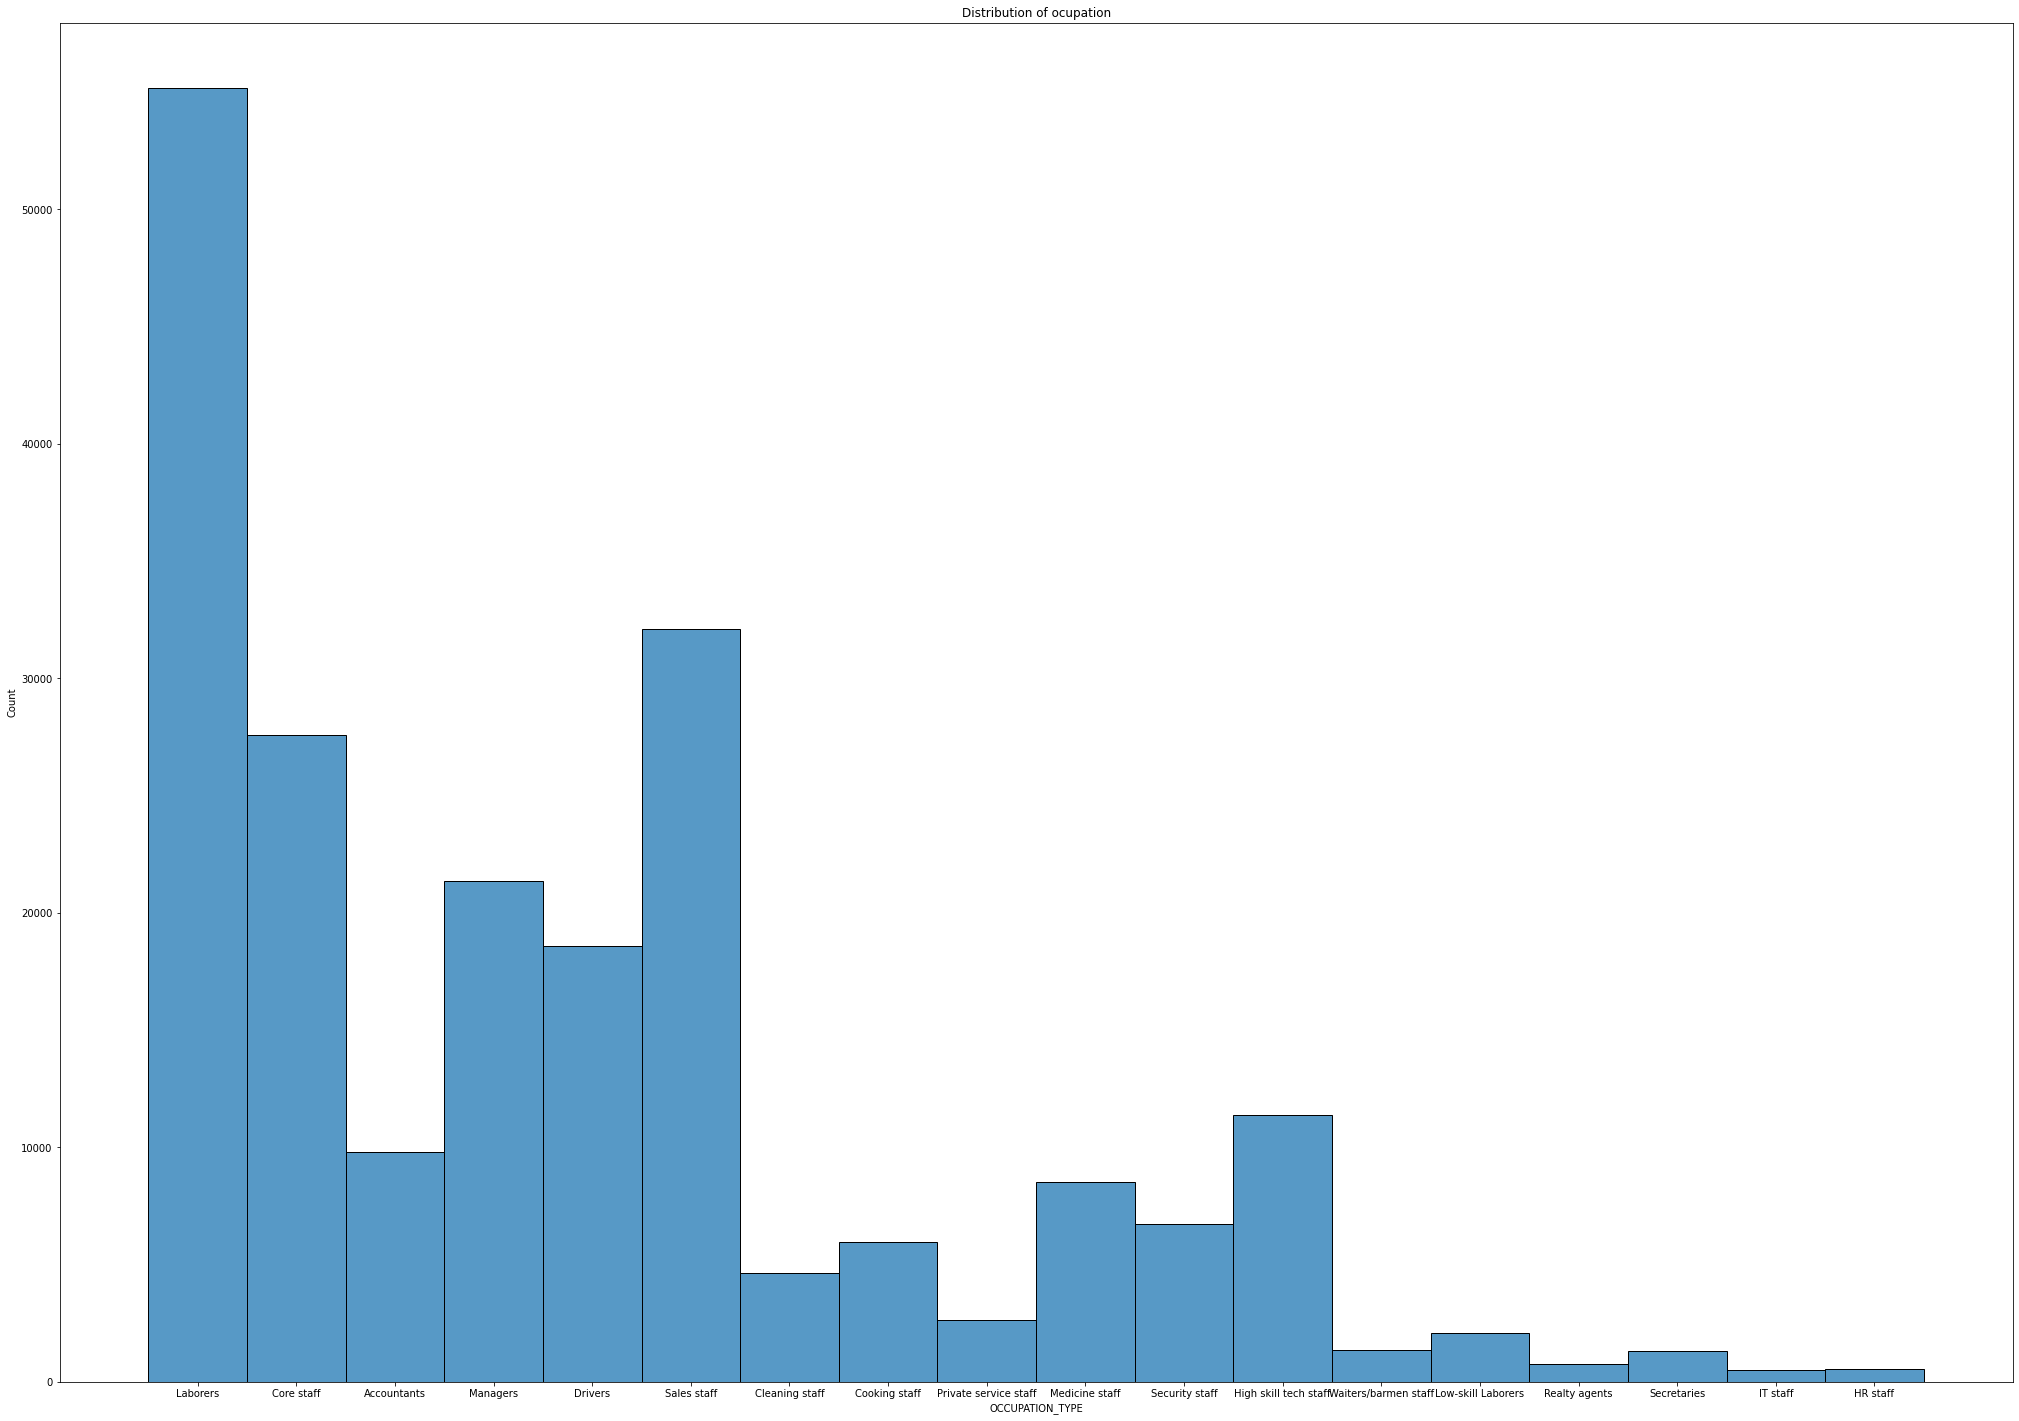

In [ ]:
"""
Plot the distribution of ocupation of the loan applicants

"""

# Create plot
sns.histplot(train.OCCUPATION_TYPE)

# Set title
plt.title("Distribution of ocupation")

# Enlarge
plt.figure(1).set_size_inches(35, 25)

------------ 4 ------------

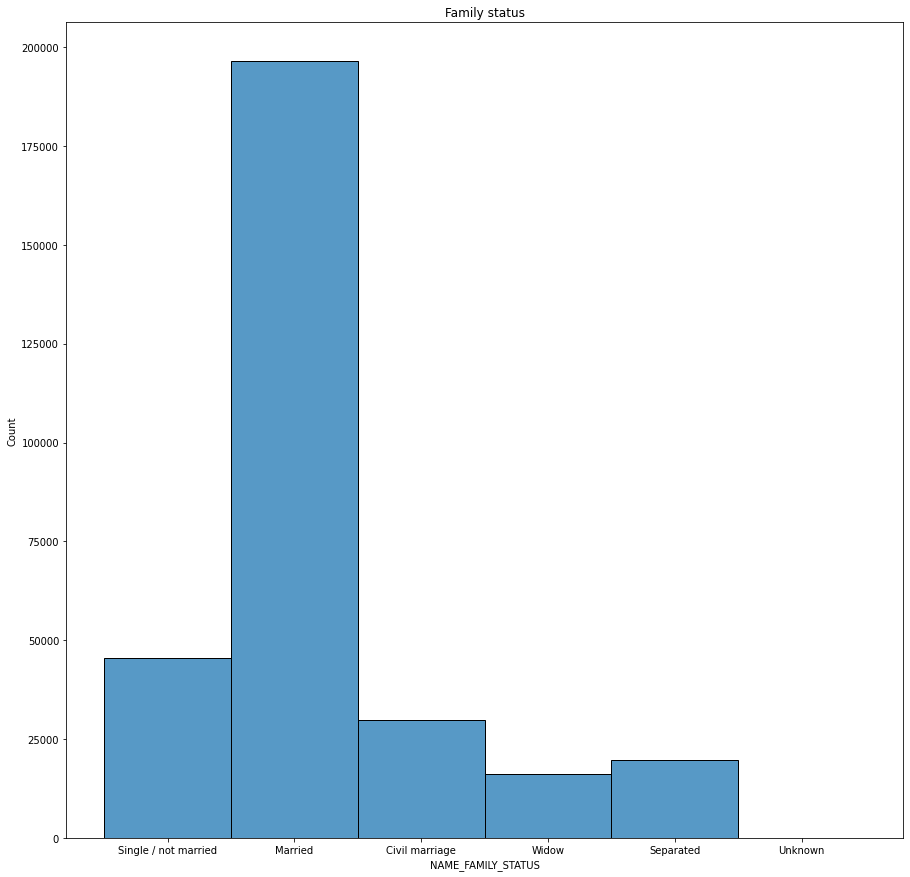

In [ ]:
"""
Plot the family status of the applicants

"""

# Create plot
sns.histplot(train.NAME_FAMILY_STATUS)

# Set title
plt.title("Family status")

# Enlarge
plt.figure(1).set_size_inches(15, 15)

------------ 5 ------------

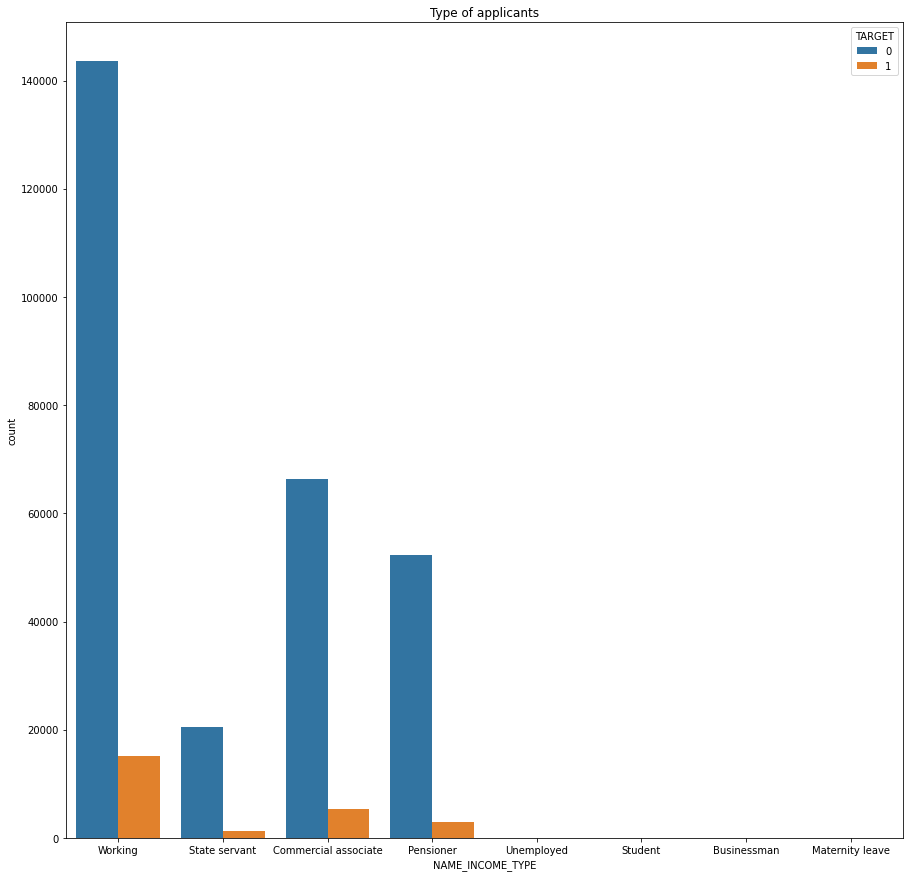

In [ ]:
"""
Plot the income type of applicants grouped by the target variable

"""

# Create plot
sns.countplot(data=train,x="NAME_INCOME_TYPE",hue="TARGET")

# Set title
plt.title("Type of applicants")

# Enlarge
plt.figure(1).set_size_inches(15, 15)

plt.show()


## Preprocessing

In [ ]:
trainX = train.drop(["TARGET","SK_ID_CURR"],axis=1)
trainY = train.TARGET

In [ ]:
def preprocessing(trainX, test):

    # Delete XNA of the CODE_GENDER column
    trainX[trainX.CODE_GENDER == "XNA"] = trainX[trainX.CODE_GENDER ==
                                              "XNA"].replace("XNA", train.CODE_GENDER.mode()[0])

    # Iterate columns
    for i in trainX.columns:

        # If the type is object
        if trainX[i].dtypes == "O":

            # Fill nan with mode
            trainX[i] = trainX[i].fillna(trainX[i].mode()[0])
            test[i] = test[i].fillna(test[i].mode()[0])

            # If the len the column is < = 2
            if len(trainX[i].unique()) <= 2:

                # Categorical Encoding with sklearn
                encoder1 = LabelEncoder()

                # Train and transform column
                trainX[i] = encoder1.fit_transform(trainX[i])

                # Tranform column
                test[i] = encoder1.transform(test[i])

            # If the len the column is > = 2
            else:

                # Reset index in dataset
                trainX.reset_index(inplace=True, drop=True)
                test.reset_index(inplace=True, drop=True)

                # Create var with encoder
                encoder2 = OneHotEncoder(handle_unknown="ignore")

                # Train encoder
                encoder2.fit(trainX[i].values.reshape(-1, 1))

                # Geo name of the columns
                column_name = encoder2.get_feature_names([i])

                # Create dataframe with one hot from train
                encoder_df = pd.DataFrame(
                    encoder2.transform(trainX[[i]]).toarray(), columns=column_name
                )

                # Create dataframe with one hot from test
                encoder_df2 = pd.DataFrame(
                    encoder2.transform(test[[i]]).toarray(), columns=column_name
                )

                # Create join in train
                trainX = trainX.join(encoder_df)

                # Create join in test
                test = test.join(encoder_df2)

                # Delete columns
                trainX.drop(columns=[i], inplace=True)
                test.drop(columns=[i], inplace=True)

        # If the type is int
        else:
            
            # Create percentile Q1
            Q1 = np.percentile(trainX[i], 25, interpolation="midpoint")

            # Create percentile Q3
            Q3 = np.percentile(trainX[i], 75, interpolation="midpoint")
            
            # Calculate interquartilic range 
            IQR = Q3 - Q1

            # Correction of the outliers
            trainX[i][trainX[i] >= Q3 + 1.5 * IQR] = trainX[i].median()

            # Fill nan with median
            trainX[i] = trainX[i].fillna(trainX[i].median())
            test[i] = test[i].fillna(test[i].median())


            # Scaler
            scaler = MinMaxScaler()

            # If i is column TARGET or SK_ID_CURR continue
            if (i == "TARGET") or i == ("SK_ID_CURR"):

                continue

            # We apply scaler
            else:

                # Train and tranfotm train dataset
                trainX[i] = scaler.fit_transform(trainX[i].values.reshape(-1, 1))

                # Transform test dataset
                test[i] = scaler.transform(test[i].values.reshape(-1, 1))

    return trainX, test


In [ ]:
# Call fuction
trainX, test = preprocessing(trainX, test)


## Training Models

### Baseline: LogisticRegression

------------ 1 ------------

In [ ]:
"""
Import LogisticRegression from sklearn and train a model using the preprocesed train data from the previous section, 
and just default parameters. If you receive a warning because the algorithm failed to converge,
try increasing the number of iterations or decreasing the C parameter

 """

# Create model
LR = LogisticRegression(random_state=42)

# Train model
LR.fit(X=trainX,y=trainY)

LogisticRegression(random_state=42)

------------ 2 ------------

In [ ]:
"""
Use the trained model to predict probabilites for the test data, and then save the results to
a csv in the format expected in the competition: a SK_ID_CURR column and a TARGET column with probabilities.
REMEMBER: the TARGET columns should ONLY contain the probabilities that the debt is not repaid 
(equivalent to the class 1).

"""

# Create var with predict probability
var = LR.predict_proba(test.drop("SK_ID_CURR",axis=1))[:,1]

# Create data frame
proba_df = pd.DataFrame(var,columns=["TARGET"])

# Join predict
proba_df = proba_df.join(test.SK_ID_CURR)

# Order columns
proba_df = proba_df[["SK_ID_CURR","TARGET"]]

# Create dataframe
proba_df.to_csv("Prueba.cvs",index=False,header=1)


------------ 3 ------------

Go to the Kaggle competition, and in the [submissions page](https://www.kaggle.com/competitions/home-credit-default-risk/submit) load your csv file. Report here the result in the private score you obtained.

Score: 0.62768

### Training a Random Forest Classifier 

------------ 1 ------------

In [ ]:
"""
Train a RandomForestClassifier, print the time taken by the fit function. Just use default hyperparameters, except for n_jobs,
which should be set to "-1" to allow the library to use all CPU cores to speed up training time.

"""
# Create model
RF = RandomForestClassifier(n_jobs=-1)

# Train model
RF.fit(trainX,trainY)

RandomForestClassifier(n_jobs=-1)

------------ 2 ------------

In [ ]:
"""
Use the classifier to predict probabilities on the test set, and save the results to a csv file.

"""

# Create var with predict probability
var2 = RF.predict_proba(test.drop("SK_ID_CURR",axis=1))[:,1]

# Create data frame
proba_df = pd.DataFrame(var2,columns=["TARGET"])

# Join predict
proba_df = proba_df.join(test.SK_ID_CURR)

# Order columns
proba_df = proba_df[["SK_ID_CURR","TARGET"]]

# Create dataframe
proba_df.to_csv("Prueba2.cvs",index=False,header=1)

------------ 3 ------------

In [ ]:
"""
Load the predictions to the competition. Report the private score here.

"""

# This model should have a private score around 0.68 
Score: 0.67508

### Randomized Search with Cross Validation

------------ 1 ------------

In [ ]:
"""
Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier.
The validation metric used to evaluate the models should be "roc_auc".

"""

# Start time
start = time.time()

# Create model
RFCV = RandomForestClassifier(random_state=42)

# Hyperparameter
example_hyperparameter_grid = {
 'bootstrap': [True, False],
 'max_depth': [10, 50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200]
}

# search hyperparameters
b = RandomizedSearchCV(RFCV,example_hyperparameter_grid,random_state=42,scoring="roc_auc",cv=3,n_iter=10)

# Create variable with model train
search = b.fit(trainX,trainY)

# End time
end = time.time()

# Print time
print(end - start)

4760.398012161255


------------ 2 ------------

In [ ]:
"""
Use the classifier to predict probabilities on the test set, and save the results to a csv file.

"""

# Create var with predict probability
var3 = search.predict_proba(test.drop("SK_ID_CURR",axis=1))[:,1]

# Create data frame
proba_df = pd.DataFrame(var3,columns=["TARGET"])

# Join predict
proba_df = proba_df.join(test.SK_ID_CURR)

# Order columns
proba_df = proba_df[["SK_ID_CURR","TARGET"]]

# Create dataframe
proba_df.to_csv("Prueba3.cvs",index=False,header=1)

------------ 3 ------------

In [ ]:
"""
Load the predictions to the competition. Report the private score here.

"""

# This model should have a private score around 0.70 
Score: 0.70932


------------ 4 ------------

In [ ]:
"""
If you have the time and resources, you can train the model for longer iterations, or select more estimator sizes. 
This is optional, but if you, we would love to see your results.

"""

# """"" in the previous scores it was used  StandarScaler() """""

# When apply MaxMinScaler
print("BASELINE Score: 0.62650")
print("RandomForestClassifier Score: 0.66308")
print("RandomForestClassifierCV Score: 0.70919")
print("LightGBM Score: 0.73999")

BASELINE Score: 0.62650
RandomForestClassifier Score: 0.66308
RandomForestClassifierCV Score: 0.70919
LightGBM Score: 0.73999


### Optional: Training a LightGBM model 

In [ ]:
"""
Gradient Boosting Machine is one of the most used machine learning algorithms for tabular data.
Lots of competitions have been won using models from libraries like XGBoost or LightGBM. 
You can try using [LightGBM](https://lightgbm.readthedocs.io/en/latest/)
to train a new model an see how it performs compared to the other classifiers you trained. 

"""

# Copy train
df = trainX.copy()

# Solved error JSON
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# Create model
clf = lgb.LGBMClassifier(random_state=42)

# Train model
clf.fit(df,trainY)




LGBMClassifier(random_state=42)

In [ ]:

# Create var with predict probability
clf1 = clf.predict_proba(test.drop("SK_ID_CURR",axis=1))[:,1]

# Create data frame
proba_df = pd.DataFrame(clf1,columns=["TARGET"])

# Join predict
proba_df = proba_df.join(test.SK_ID_CURR)

# Order columns
proba_df = proba_df[["SK_ID_CURR","TARGET"]]

# Create dataframe
proba_df.to_csv("Prueba4.cvs",index=False,header=1)

In [ ]:
# Score
Score: 0.73983

### Optional: Using Scikit Learn Pipelines 

In [ ]:
"""
So far you've created special functions or blocks or code to chain operations on data and then train the models.
But, reproducibility is important, and you don't want to have to remember the correct steps to follow each time you 
have new data to train your models. There are a lots of tools out there that can help you with that, 
here you can use a [Sklearn Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) 
to process your data.
 
"""




AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'